In [1]:
'''
# load utils.py
import os
import sys
sys.path.append(os.path.abspath("capstone1/utils.py"))


#standard imports
import pandas as pd
import numpy as np
import seaborn as sns 

# to be able to count genres since movies may fall under several genres
from sklearn.feature_extraction.text import CountVectorizer

# to connect plotly with pandas
import cufflinks as cf  
import plotly           # to plot interactive visualizations
import chart_studio.plotly as py  #more charting options 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


#to run plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot   
init_notebook_mode(connected=True)
cf.go_offline()
'''

'\n# load utils.py\nimport os\nimport sys\nsys.path.append(os.path.abspath("capstone1/utils.py"))\n\n\n#standard imports\nimport pandas as pd\nimport numpy as np\nimport seaborn as sns \n\n# to be able to count genres since movies may fall under several genres\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# to connect plotly with pandas\nimport cufflinks as cf  \nimport plotly           # to plot interactive visualizations\nimport chart_studio.plotly as py  #more charting options \nimport plotly.express as px\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\n\n#to run plotly offline\nfrom plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot   \ninit_notebook_mode(connected=True)\ncf.go_offline()\n'

In [43]:
from utils import *

# to connect plotly with pandas
import cufflinks as cf  
import plotly           # to plot interactive visualizations
import chart_studio.plotly as py  #more charting options 
import plotly.express as px
#import matplotlib.pyplot as plt
%matplotlib inline


#to run plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot   
init_notebook_mode(connected=True)
cf.go_offline()


In [44]:
%store -r df_alldata
%store -r bayes_df

In [45]:
bayes_df = pd.read_csv('data/bayes_df.csv')

In [46]:
#Get Genres from DF
genres_list = get_genres(bayes_df['Genres'])
genres_list

array(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'history', 'horror',
       'music', 'musical', 'mystery', 'romance', 'sci-fi', 'sport',
       'thriller', 'war', 'western'], dtype='<U11')

### Score distribution

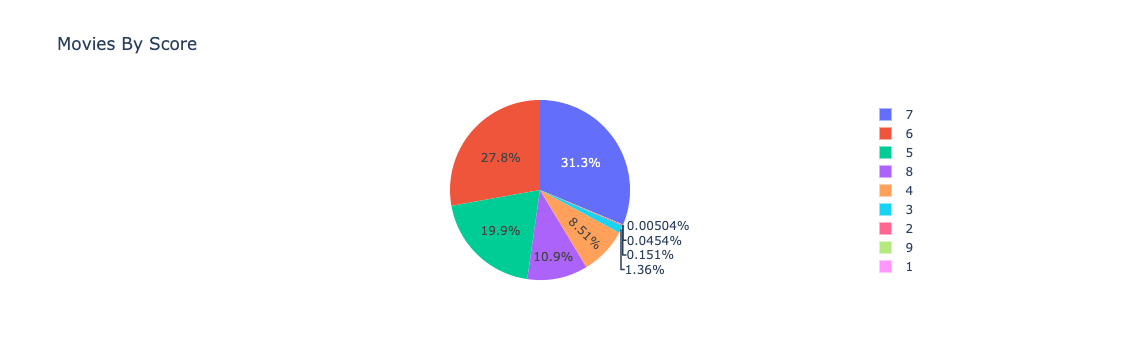

In [124]:

import plotly.express as px
#df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df = bayes_df.copy()
df = df.sort_values(by='Score', ascending=False)
df['Score']=df['Score']//1
#df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='Score', names='Score', title='Movies By Score')
#fig = px.pie(df, values='Good', names='Good', title='Movies By Score')
fig.show()

In [48]:
bayes_df.columns

Index(['Title', 'Score', 'Budget', 'Revenue', 'ROI', 'Year', 'Runtime',
       'Genres', 'Wins', 'Nominations', 'Decade', 'Success', 'Good'],
      dtype='object')

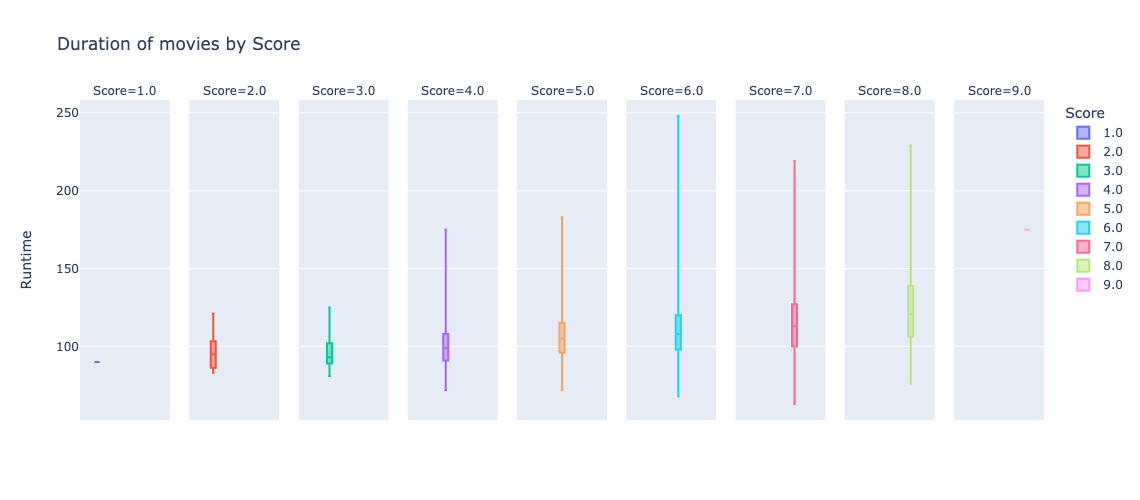

In [128]:
fig = px.box(df.sort_values(by='Score',ascending=True), 
             y="Runtime", 
             title= 'Duration of movies by Score',
             facet_col = 'Score', 
             points = False,
             color = 'Score',
             height=500)
fig.show()

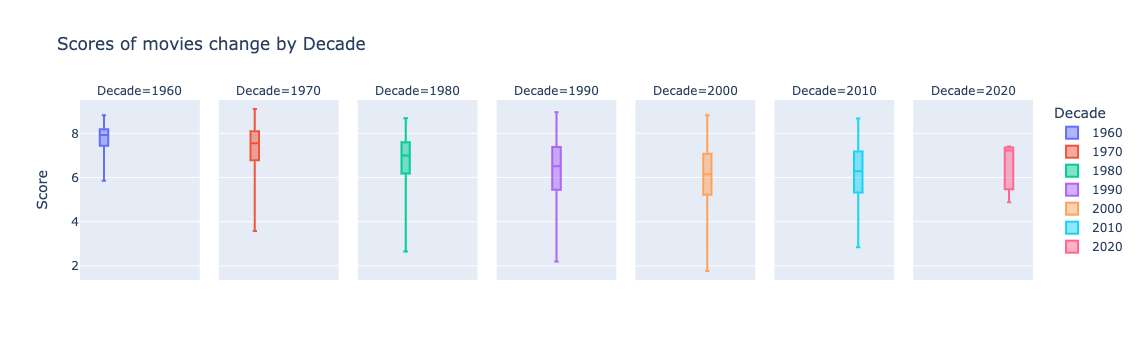

In [122]:
%store -r bayes_adj
fig = px.box(bayes_df.sort_values(by='Decade',ascending=True), 
             y="Score", 
             title= 'Scores of movies change by Decade',
             facet_col = 'Decade', 
             points = False,
             color = 'Decade')
fig.show()

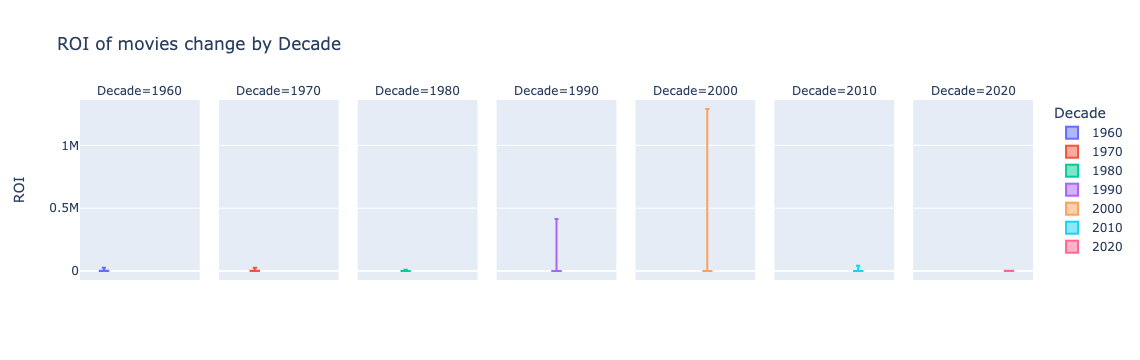

In [129]:
fig = px.box(bayes_df.sort_values(by='Decade',ascending=True), 
             y="ROI", 
             title= 'ROI of movies change by Decade',
             facet_col = 'Decade', 
             points = False,
             color = 'Decade')
fig.show()

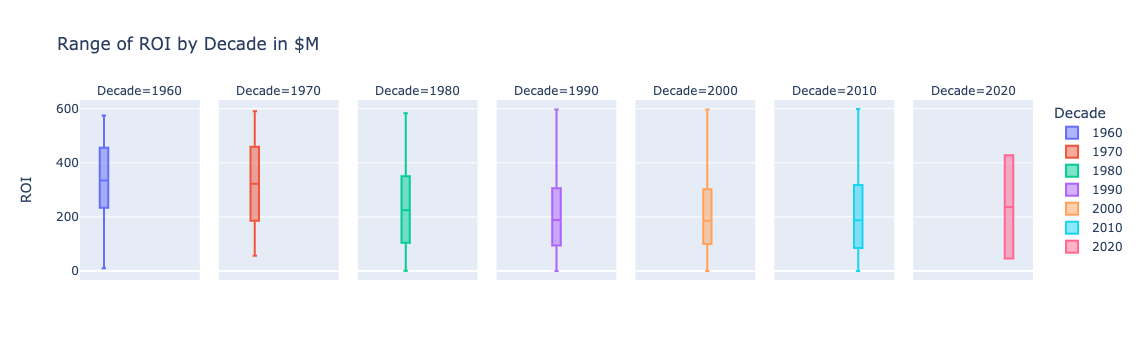

In [130]:
fig = px.box(bayes_adj.sort_values(by='Decade',ascending=True), 
             y="ROI", 
             title= 'Range of ROI by Decade in $M',
             facet_col = 'Decade', 
             points = False,
             color = 'Decade')
fig.show()

## Movies by Genre from 1960-2020

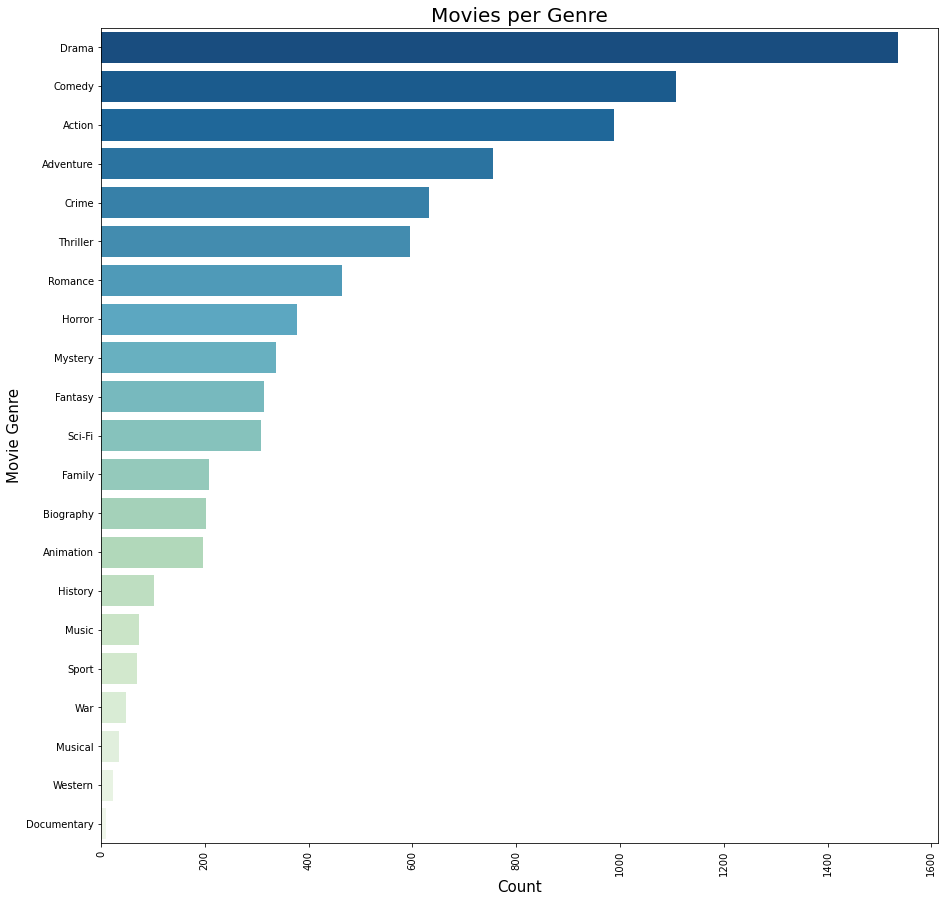

In [5]:
#Seaborn
#from collections import Counter
#df = bayes_df.Genres.copy()
plot_genres()


In [ ]:
# Creating dataset
cars = ['AUDI', 'BMW', 'FORD',
        'TESLA', 'JAGUAR', 'MERCEDES']
  
data = [23, 17, 35, 29, 12, 41]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars)
  
# show plot
plt.show()


### Detailed genres by decade

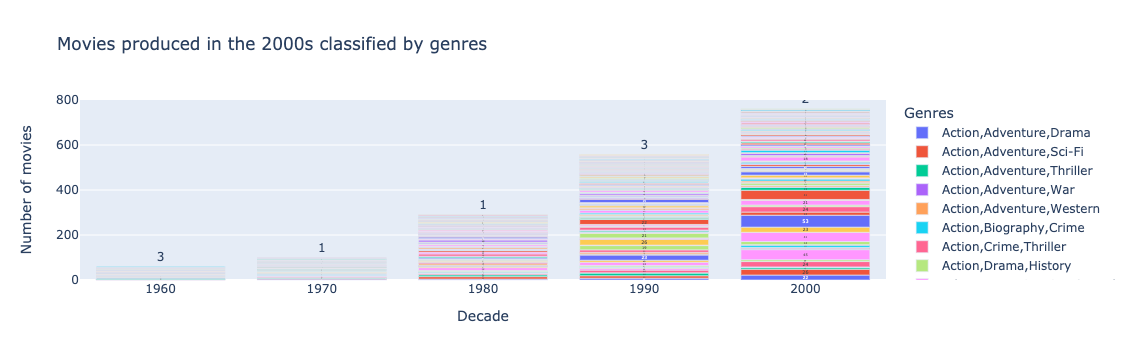

In [115]:
years_df = bayes_df[['Decade','Title', 'Genres']].groupby(['Decade','Genres']).count().reset_index().rename(columns={'Title':'number_of_movies'})
years_df = years_df.sort_values(by=['number_of_movies'], ascending=False)



years_df = df[['Decade','Title', 'Genres']].groupby(['Decade','Genres']).count().reset_index().rename(columns={'Title':'number_of_movies'}).head(500)

#years_df['Score']=years_df['Score']//1

detailed_genres_bar = px.bar(years_df, 
                             x ='Decade', 
                             y = 'number_of_movies', 
                             color = 'Genres', 
                             title='Movies produced in the 2000s classified by genres', 
                             text = 'number_of_movies',
                             labels = dict(year = 'Decade', number_of_movies = 'Number of movies')
                             )
detailed_genres_bar.show()

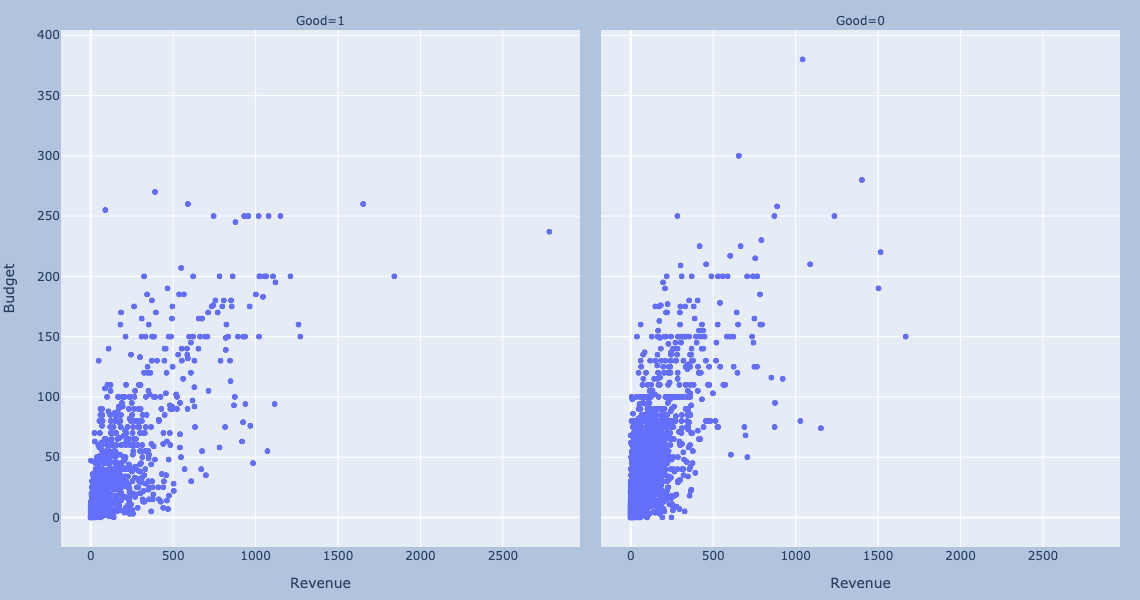

In [78]:
import plotly.express as px

df = bayes_df
fig = px.scatter(df, x="Revenue", y="Budget", facet_col="Good",
                 width=800, height=600)

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

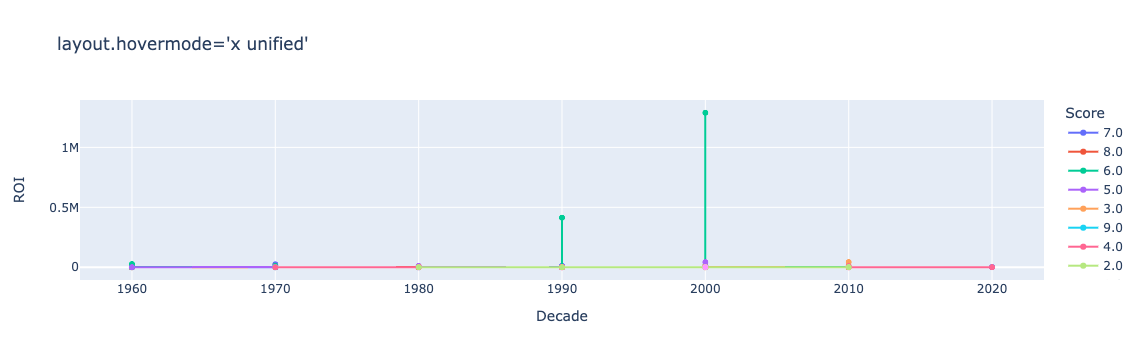

In [86]:
import plotly.express as px

dfline = bayes_df.sort_values(by='Decade')
dfline['Score'] = dfline['Score']//1
fig = px.line(dfline, x="Decade", y="ROI", color="Score", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")

fig.show()

In [ ]:
import plotly.express as px

df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", facet_col="sex",
                 width=800, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

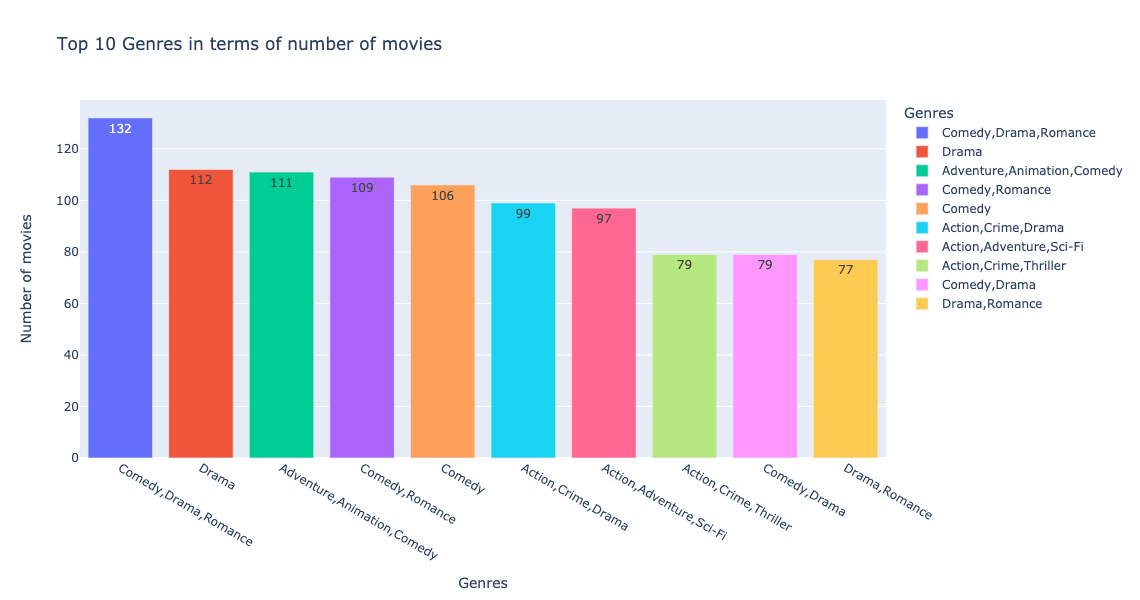

In [91]:
genres_bar = px.bar(genres_top10_df, 
                    x = 'Genres', 
                    y = 'number_of_movies', 
                    title = 'Top 10 Genres in terms of number of movies',
                    text = 'number_of_movies', 
                    labels = dict(genre = 'Genre', number_of_movies = 'Number of movies'),
                    color = 'Genres',
                    width=800,height=600)
                    
genres_bar.show()

In [87]:
genres_df = bayes_df[['Genres','Title']].groupby(['Genres']).count().reset_index().rename(columns={'Title':'number_of_movies'})

#Sort them in descending order so we can extract the 10 genres with the most movies made
genres_df = genres_df.sort_values(by='number_of_movies', ascending=False)
genres_top10_df = genres_df.head(10)

In [103]:
detailed_genres_bar = px.bar(years_df, 
                             x ='year', 
                             y = 'number_of_movies', 
                             color = 'genre', 
                             title='Movies produced in the 2000s classified by genres', 
                             text = 'number_of_movies',
                             labels = dict(year = 'Year', number_of_movies = 'Number of movies')
                             )
detailed_genres_bar.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Decade', 'Score', 'number_of_movies'] but received: year

# Show the Revenue over the Decades

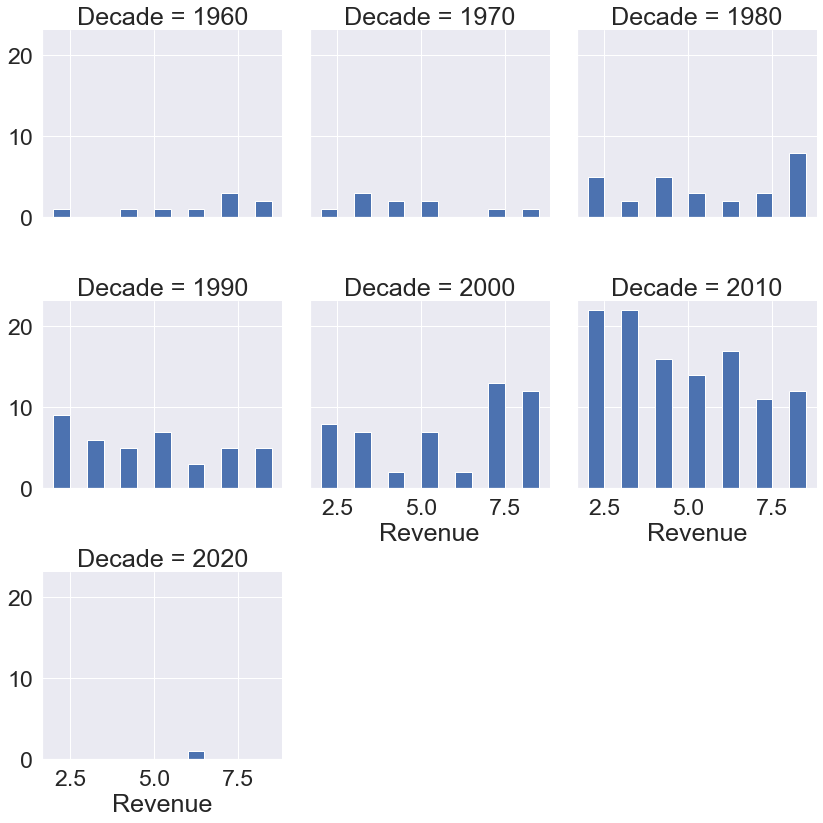

In [6]:
plot_decade(bayes_df,'Decade','Revenue')   

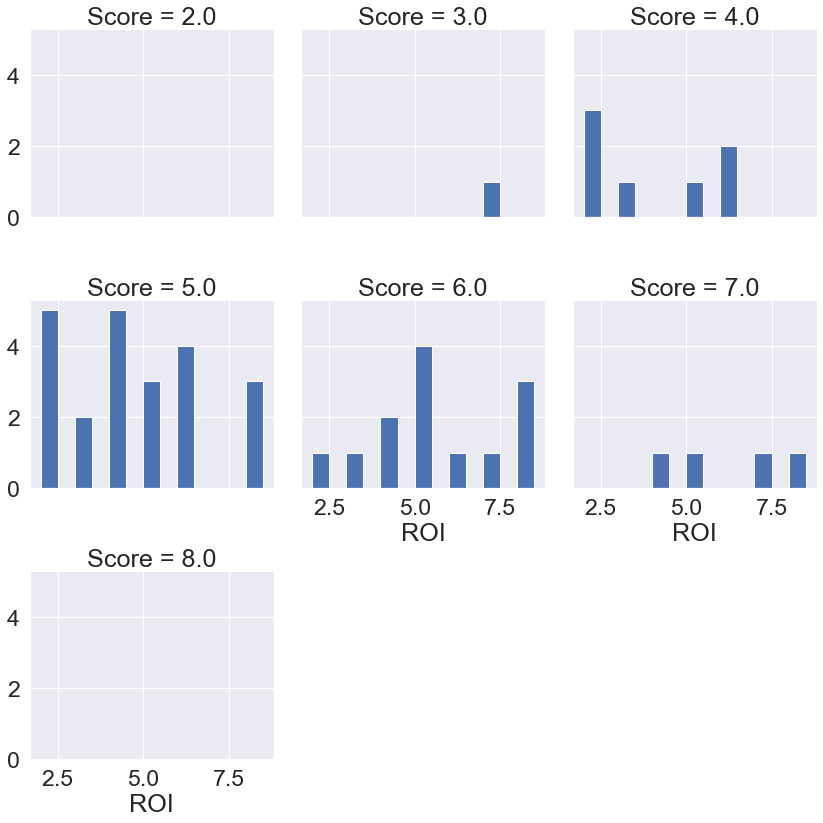

In [15]:
bayes_adj = bayes_df[bayes_df['ROI']<600]
bayes_adj['Score']=bayes_adj['Score']//1
bayes_adj.to_csv('bayes_adj', index = False, header=True)
plot_decade(bayes_adj,'Score','ROI')   

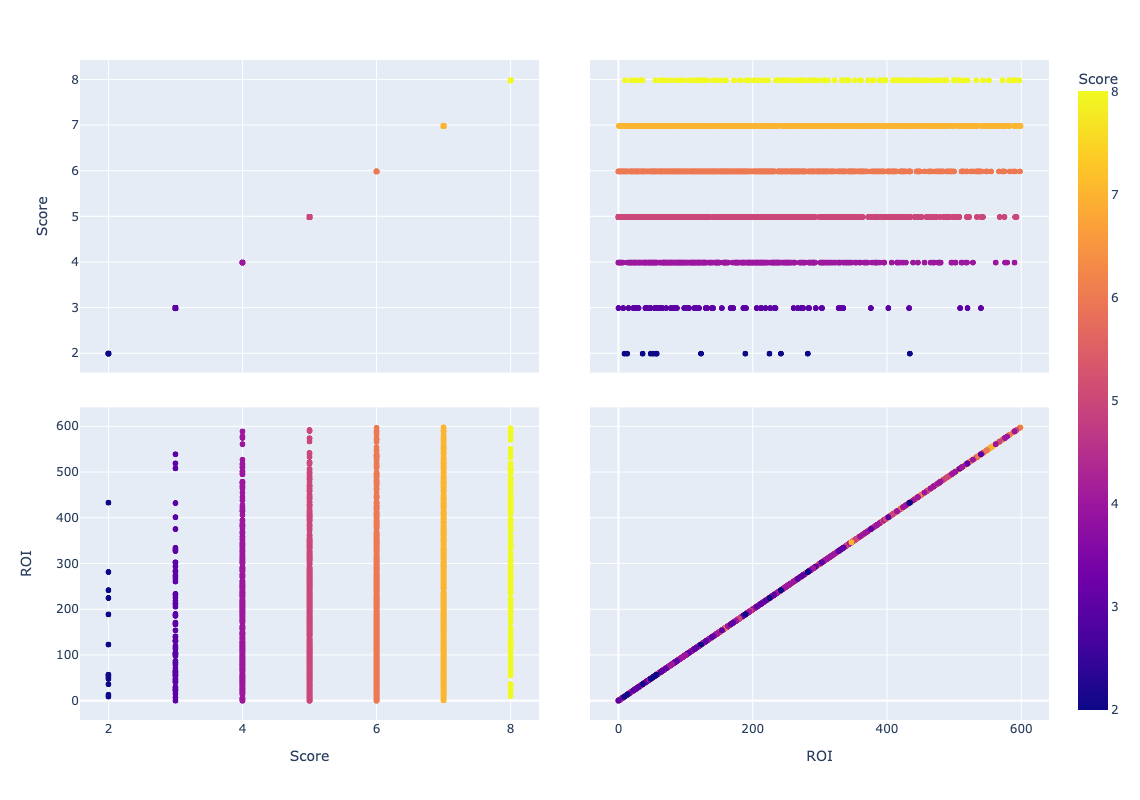

In [16]:

fig = px.scatter_matrix(bayes_adj,
    dimensions=["Score", "ROI"],
    color="Score", width=800, height=800)
fig.show()

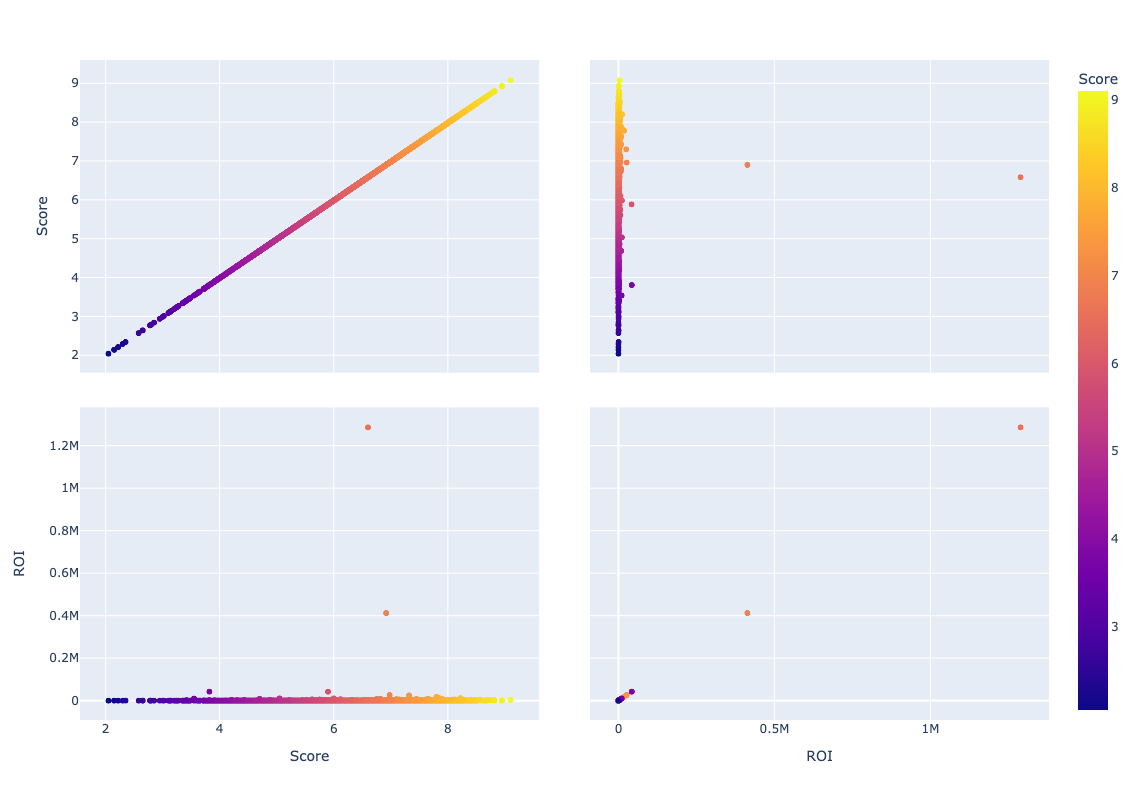

In [17]:
# Correlation Matrix all data

fig = px.scatter_matrix(bayes_df,
    dimensions=["Score", "ROI"],
    color="Score", width=800, height=800)
fig.show()

In [88]:
'''
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="--", 
                color = kwargs.get("color", "r"))
    txkw = dict(size=15, color = kwargs.get("color", "r"))

    label_x_pos_adjustment = 0.08 # this needs customization based on your data
    label_y_pos_adjustment = 5 # this needs customization based on your data
    if x.mean() < 6: # this needs customization based on your data
        tx = "mean: {:.2f}\n(std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)
    else:
        tx = "mean: {:.2f}\n  (std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() -1.4, label_y_pos_adjustment, tx, **txkw)

_ = bayes_df.groupby(['Decade','Year'])['Revenue'].mean().reset_index()

g = sns.FacetGrid(_, col="Decade")#, height=4, aspect=0.9, col_wrap=3, margin_titles=True)
g.map(sns.kdeplot, "Revenue", shade=True, color='royalblue')
g.map(vertical_mean_line, "Revenue")
'''

'\ndef vertical_mean_line(x, **kwargs):\n    plt.axvline(x.mean(), linestyle ="--", \n                color = kwargs.get("color", "r"))\n    txkw = dict(size=15, color = kwargs.get("color", "r"))\n\n    label_x_pos_adjustment = 0.08 # this needs customization based on your data\n    label_y_pos_adjustment = 5 # this needs customization based on your data\n    if x.mean() < 6: # this needs customization based on your data\n        tx = "mean: {:.2f}\n(std: {:.2f})".format(x.mean(),x.std())\n        plt.text(x.mean() + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)\n    else:\n        tx = "mean: {:.2f}\n  (std: {:.2f})".format(x.mean(),x.std())\n        plt.text(x.mean() -1.4, label_y_pos_adjustment, tx, **txkw)\n\n_ = bayes_df.groupby([\'Decade\',\'Year\'])[\'Revenue\'].mean().reset_index()\n\ng = sns.FacetGrid(_, col="Decade")#, height=4, aspect=0.9, col_wrap=3, margin_titles=True)\ng.map(sns.kdeplot, "Revenue", shade=True, color=\'royalblue\')\ng.map(vertical_mean_line, 

In [86]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [89]:
# random variable generation for gamma distribution

def generate_gamma_dist(shape):
    dist_gamma = sorted(stats.gamma.rvs(shape, loc=0, scale=1000, size=5000))
    shape, loc, scale = stats.gamma.fit(dist_gamma, loc=0)
    pdf_gamma = stats.gamma.pdf(dist_gamma, shape, loc, scale)
    return dist_gamma, pdf_gamma

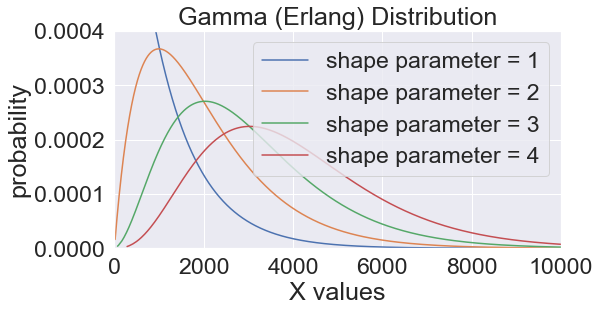

In [91]:
# visualize
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4))
for i in range(1, 5):
    x, y = generate_gamma_dist(i)
    ax.plot(x, y, label='shape parameter = %s' % i)
    
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.set_ylim(0, 0.0004)
ax.set_xlim(0, 10000)
ax.set_title('Gamma (Erlang) Distribution')
ax.legend();

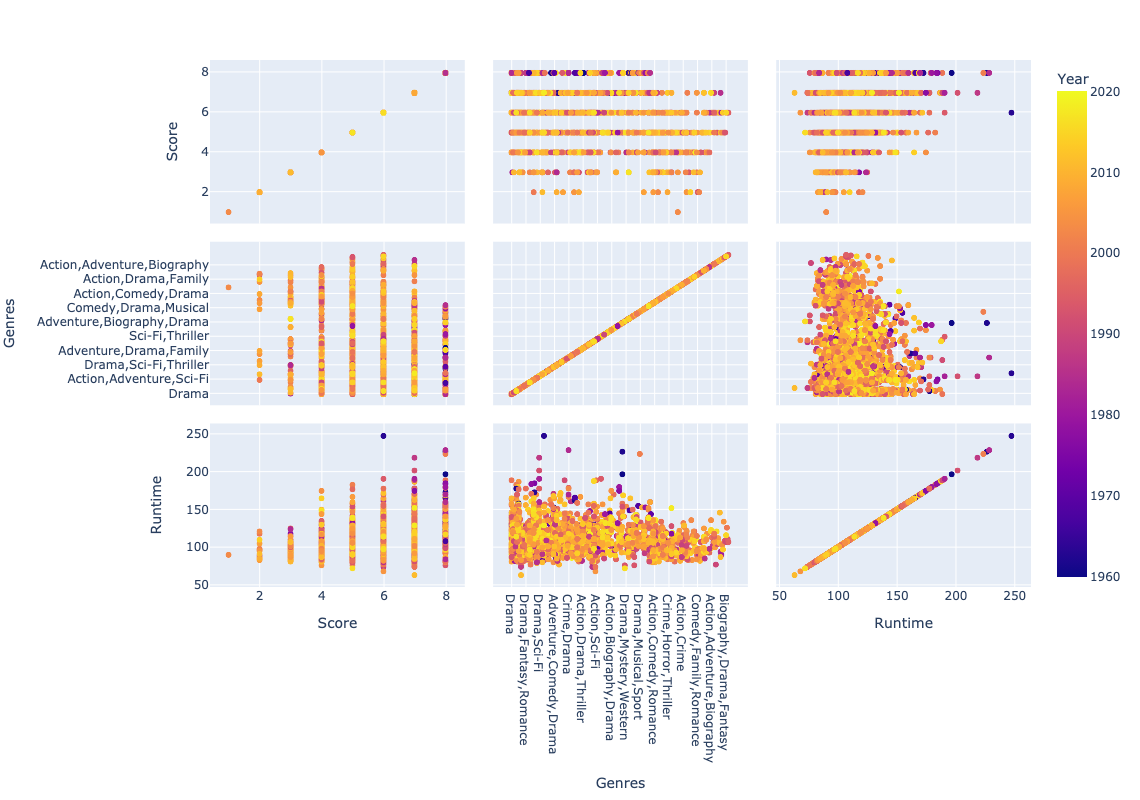

In [159]:
bayes_adj2 = bayes_adj.sort_values(by="Good",ascending=False)
fig = px.scatter_matrix(bayes_adj2,
    dimensions=["Score", "Genres", "Runtime",],
    color="Year", width=800, height=800)
fig.show()

In [7]:
#Presentation

import plotly.express as px
df = years_by_genre
fig = px.box(df, x="Good", y="Success")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Title', 'Score', 'Budget', 'Revenue', 'ROI', 'Year', 'Runtime', 'Genres', 'Wins', 'Nominations', 'Decade'] but received: Good

## For Hypothesis Testing and Statistical Analysis:
- A <b>Good movie </b>is defined as having a score > 70.00 or having at least 1 Oscar Win or Oscar Nomination.
    - this is flagged as Good == 1 in the dataframe
- A <b>Financially successful</b> movie has Revenue = 3 * Budget
    - this is flagged as Success  == 1
    
## For Bayes:    
H0 = Good Movies are financially successful.<br>
HA = Good Movies are not financially successful.




In [133]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
def plot_beta(alpha, beta, ax=None, title="", xlabel="",ylabel="", label=""):
    '''plot the Beta distribution PDF with parameters alpha and beta
    Args
    ----
        alpha (positive number)
        beta (positive number)
    '''
    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, 301)

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    if ax is None:
        fig, ax = plt.subplots()
    xticks=[0.0, 0.5, 1.0]
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    else:
        ax.set_title(f'Beta distribution alpha={alpha}, beta={beta} ')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, min(np.max(y)*1.2,100))

def estimate_beta_params(data):
    """Estimate the alpha & beta parameters of beta distribution by fitting Beta distribution to the conversion data 
    Args
    ----
        data: a list of 0 (miss) or 1 (convert) or a 1-D np.array
    return
    ------
        Alpha: number of successes +1
        Beta: Number of failures +1
        Mean: "success" rate
        num_conversions & total_visitors: used to make labels on graphs 
    
    """
    #array of website conversions... zeros and ones (convert or didnt convert)
    website_samples = np.array(data)
    
    #total number of conversions
    num_conversions = website_samples.sum()
    #total number of datapoints
    total_visitors = len(website_samples)
    
    #plus one to set a and beta as uniform priors...try other numbers to see the changes
    alpha = num_conversions + 1
    beta = (total_visitors - num_conversions) + 1
    
    #mean number of conversions... aka conversion rate
    mean = 1 * num_conversions / total_visitors

    return alpha, beta, mean, num_conversions, total_visitors

def plot_beta_from_data(data, ax=None, label=None):
    """First estimate the Beta distribution parameters from data and then plot the Beta PDF distribution
    Args
    ----
        data: a list of 0 (miss) or 1 (convert)
    
    """
    alpha, beta, mean, num_conversions, total_visitors = estimate_beta_params(data)
    title =  r"Successful {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax=ax, title=title, xlabel="Success Rate", ylabel="Probability Density", label=label)


## Setting up data for Hypothesis Test

### Hypothesis 1

<b>H<sub>0</sub> : </b>Good movies have a high probability of financial success in the box office.<br>
<b>H<sub>A</sub> : </b>Good movies have a high probability of financial success in the box office.

In [ ]:
df_good = bayes_adj[bayes_adj['Good']==1] #742 records -- Movies with Score>= 7.5 
df_bad = bayes_adj[bayes_adj['Good']==0] #2042 records -- Movies with Score < 7.5 

data1 = df_good.sample(n=300)['Success']
data2 = df_bad.sample(n=300)['Success']

In [194]:


df_success = bayes_adj[bayes_adj['Success']==1] # 760 records -- movies with ROI > 3xBudget
df_nsuccess = bayes_adj[bayes_adj['Success']==0] # 2024 records -- movies with ROI > 3xBudget

data3 = df_success.sample(n=300)['Good']
data4 = df_nsuccess.sample(n=300)['Good']

In [193]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 33 to 3395
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        2042 non-null   object 
 1   Score        2042 non-null   float64
 2   Budget       2042 non-null   int64  
 3   Revenue      2042 non-null   int64  
 4   ROI          2042 non-null   int64  
 5   Year         2042 non-null   int64  
 6   Runtime      2042 non-null   int64  
 7   Genres       2042 non-null   object 
 8   Wins         2042 non-null   int64  
 9   Nominations  2042 non-null   int64  
 10  Decade       2042 non-null   int64  
 11  Success      2042 non-null   int64  
 12  Good         2042 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 223.3+ KB


## Perform a Mann-Whitney U Test

In [228]:
def MannWhitneyU(d1,d2):
    m_results = stats.mannwhitneyu(data1, data2, alternative = 'two-sided')
    print("Mann-Whitney U Test Results:")
    if m_results[1] > 0.05:
        print(f'p-value is {m_results[1]}, which is greater than 0.05, therefore we reject the null hypothesis')
    else:
        print(f'p-value is {m_results[1]}, which is less than 0.05, therefore we do not reject the null hypothesis ')
    #p-value>0.05 fail to reject null hypothesis


MannWhitneyU(data1,data2)

Mann-Whitney U Test Results:
p-value is 8.391654755063116e-12, which is less than 0.05, therefore we do not reject the null hypothesis 


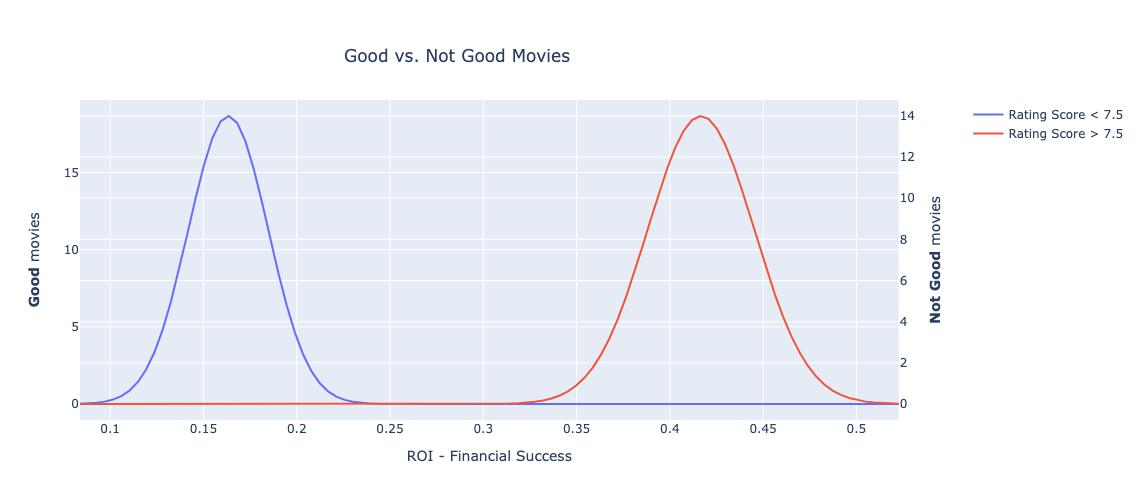

In [259]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=support, y=bad_pdf, name="Rating Score < 7.5"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=support, y=good_pdf, name="Rating Score > 7.5"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title={
        'text' : 'Good vs. Not Good Movies',
        'y':0.9,
        'x':0.5,
        'xanchor': 'right',
        'yanchor': 'top'},
    width=800, 
    height=500)
    

# Set x-axis title
fig.update_xaxes(title_text="ROI - Financial Success")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Good</b> movies", secondary_y=False)
fig.update_yaxes(title_text="<b>Not Good</b> movies", secondary_y=True)

fig.show()

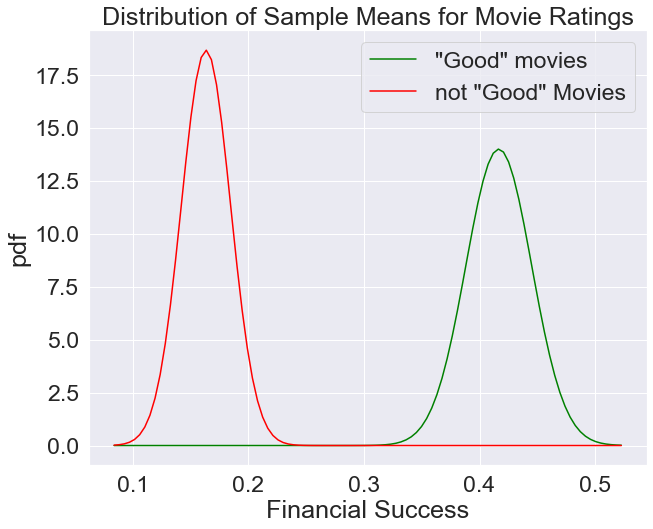

In [248]:
fig,ax = plt.subplots(figsize=(10,8))

good_dist = stats.norm(data1.mean(), data1.std()/np.sqrt(len(data1)))
bad_dist = stats.norm(data2.mean(), data2.std()/np.sqrt(len(data2)))

support = np.linspace(bad_dist.ppf(0.0001), good_dist.ppf(0.9999), 100)
good_pdf = good_dist.pdf(support)
bad_pdf = bad_dist.pdf(support)

ax.plot(support, good_pdf, color='green', label='"Good" movies')
ax.plot(support, bad_pdf, color='red', label='not "Good" Movies')
ax.legend()
ax.set_ylabel("pdf")
ax.set_xlabel('Financial Success')
ax.set_title("Distribution of Sample Means for Age")
ax.figure.savefig('images/Success.png', bbox_inches='tight');

In [203]:
use statistical analysis to determine the likelihood that good movies have a high probability of financial success. 

#plot_beta_from_data(data1)
#plot_beta_from_data(data2)
#plot_beta_from_data(data3)
#plot_beta_from_data(data4)

In [230]:
def compare_AB_conversion_rate(site_A_data, site_B_data, n=None):
    """compare the conversion rate of 2 different solutions A & B
    Args
    ----
        site_A_data (1-D np.array of shape (N,))
        site_B_data (1-D np.array of shape (N,))
        n (int): use a sub list of samples[:n]
    Return
    ------
        a plot comparing the conversion rate of site A and that of site B.
    """
    ax = plt.subplot()
    if n is None:
        n = min(len(site_A_data), len(site_A_data))
    site_A_samples = site_A_data[:n]
    site_B_samples = site_B_data[:n]
    plot_beta_from_data(site_A_samples, ax, label="Site A")
    plot_beta_from_data(site_B_samples, ax, label="Site B")
    plt.title(f'Comparing {n} Movies')
    plt.show()
    

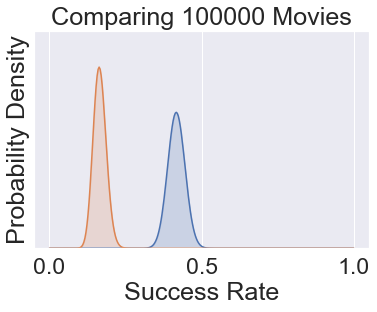

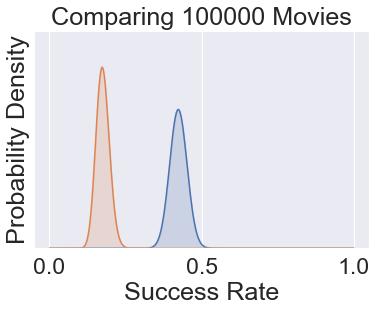

In [232]:
compare_AB_conversion_rate(data1,data2, n=100000)
compare_AB_conversion_rate(data3,data4, n=100000)

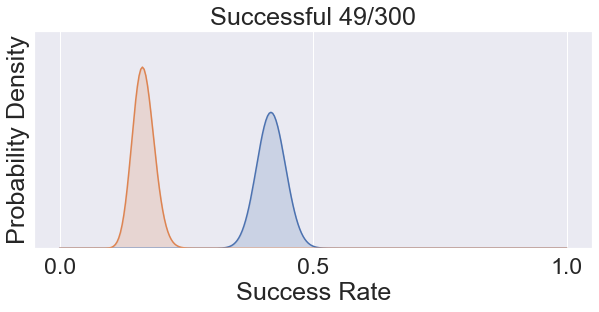

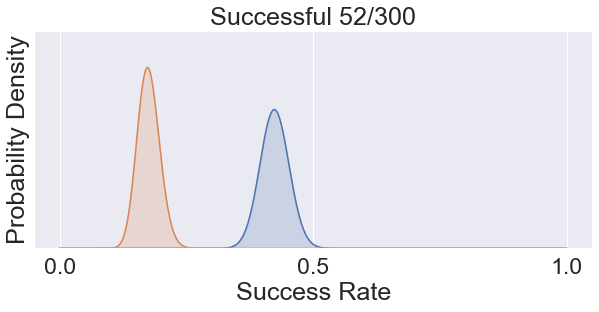

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_beta_from_data(data1, ax=ax)
plot_beta_from_data(data2, ax=ax)


fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_beta_from_data(data3, ax=ax)
plot_beta_from_data(data4, ax=ax)

In [200]:
alpha, beta = estimate_beta_params(data1)[:2]
alpha,beta

(126, 176)

In [201]:
num_simulations = 1000

#Let's just grab our Alpha and betas from site_A
alpha, beta = estimate_beta_params(data1)[:2]
print(f'Movies with 7.5 score and/or have an oscar nod, alpha and beta {alpha, beta}')
#Set up first distribution
dist_A = stats.beta(alpha, beta)


#Same steps for beta dist
alpha, beta = estimate_beta_params(data2)[:2]
print(f'Movies with below 7.5 score and no oscar nod, alpha and beta {alpha, beta}')
dist_B = stats.beta(alpha, beta)

#randomly sample 100_000 data points from each distribution
simulated_A = dist_A.rvs(num_simulations)

simulated_B = dist_B.rvs(num_simulations)


print(f'Given the data, a "good" movie is {(simulated_A > simulated_B).mean()*100}% likely to have a high probability of it being financially successful. ')

Movies with 7.5 score and/or have an oscar nod, alpha and beta (126, 176)
Movies with below 7.5 score and no oscar nod, alpha and beta (50, 252)
Given the data, a "good" movie is 100.0% likely to have a high probability of it being financially successful. 


In [202]:
num_simulations = 1000

#Let's just grab our Alpha and betas from site_A
alpha, beta = estimate_beta_params(data3)[:2]
print(f'Movies with 300%+ ROI, alpha and beta {alpha, beta}')
#Set up first distribution
dist_A = stats.beta(alpha, beta)


#Same steps for beta dist
alpha, beta = estimate_beta_params(data4)[:2]
print(f'Movies with less than 300% ROI, alpha and beta {alpha, beta}')
dist_B = stats.beta(alpha, beta)

#randomly sample 100_000 data points from each distribution
simulated_A = dist_A.rvs(num_simulations)

simulated_B = dist_B.rvs(num_simulations)


print(f'Given the data, a successful movie is {(simulated_A > simulated_B).mean()*100}% likely to have a high probability of it being good. ')

Movies with 300%+ ROI, alpha and beta (128, 174)
Movies with less than 300% ROI, alpha and beta (53, 249)
Given the data, a successful movie is 100.0% likely to have a high probability of it being good. 
